In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import describe


from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [2]:
!ls

Play.ipynb     neural_net.py  test.txt       timeSeries.cpp
a.out          play.cpp       test2.txt


In [2]:
filename = "test2.txt"

In [3]:
# time, neuron index
data = np.loadtxt(filename)
data[0:3]

array([[416.67 ,   0.   ,   0.   , ...,  17.   ,  14.   ,   7.   ],
       [352.295,   0.   ,   0.   , ...,  11.   ,   4.   ,   6.   ],
       [233.932,   7.   ,  18.   , ...,   5.   ,   6.   ,   7.   ]])

In [4]:
data.shape

(1000, 401)

## Explore the dataset

In [24]:
example1= data[np.argmin(data[:, 0])]
example1[0]

200.762

In [25]:
example2 = data[np.argmax(data[:, 0])]
example2[0]

797.713

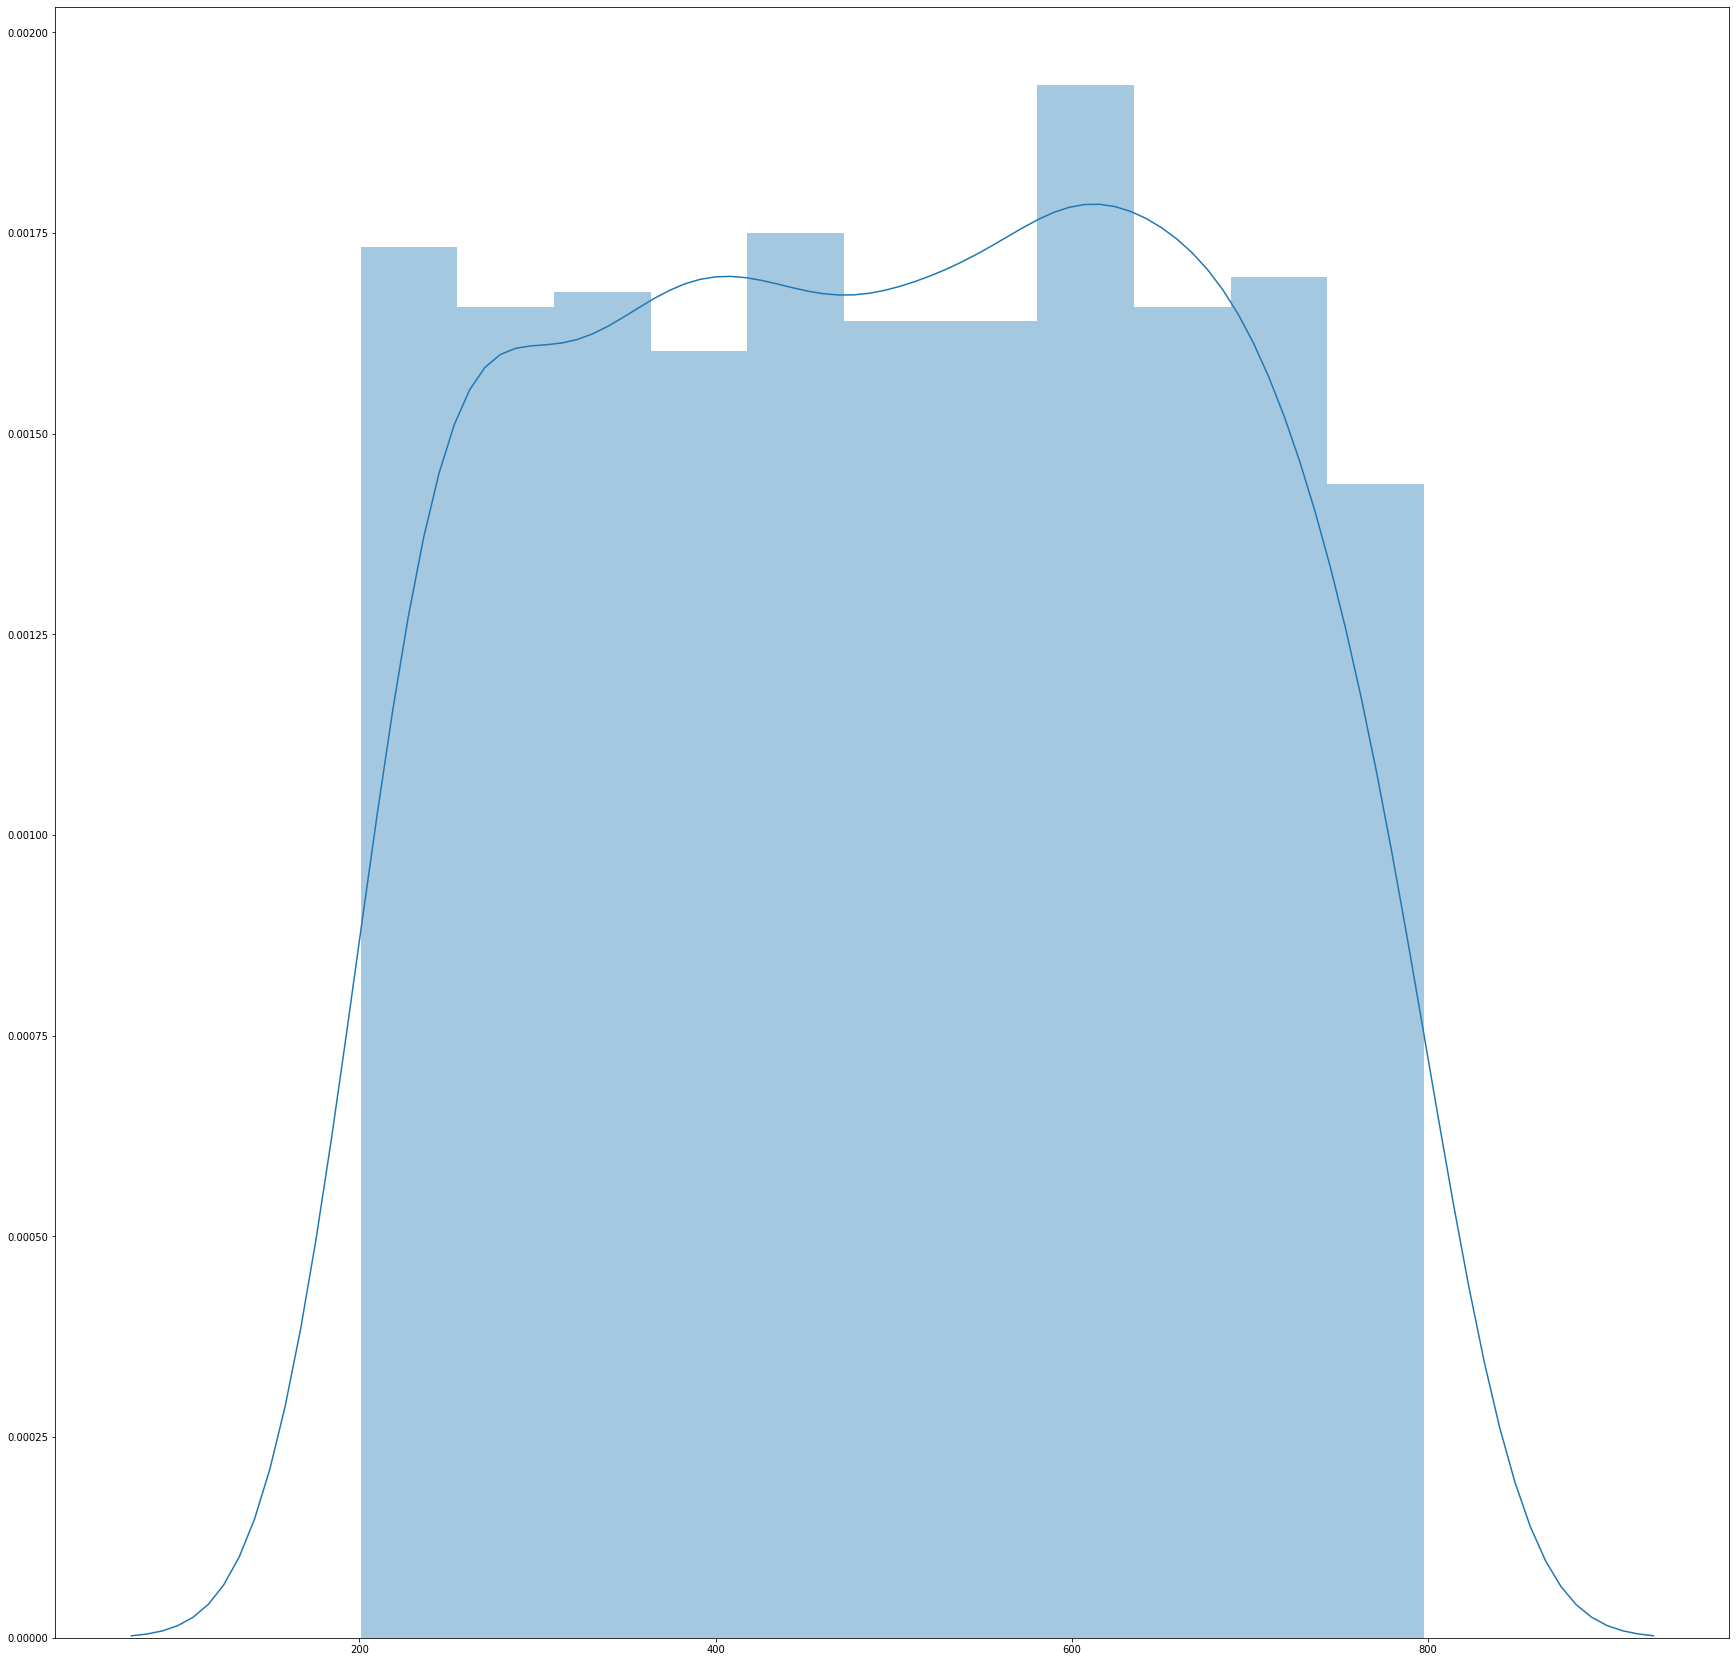

In [26]:
sns.distplot(data[:, 0])

In [8]:
np.argmax(data[:, 0])

124

In [9]:
data[257, 0]

323.379

In [10]:
example[1:201].shape

NameError: name 'example' is not defined

In [11]:
example[201:].shape

NameError: name 'example' is not defined

In [33]:
plt.rcParams["figure.figsize"] = (30,10) # width, height


In [28]:
total1 = example1[1:201] + example1[201:]

In [29]:
total2 = example2[1:201] + example2[201:]

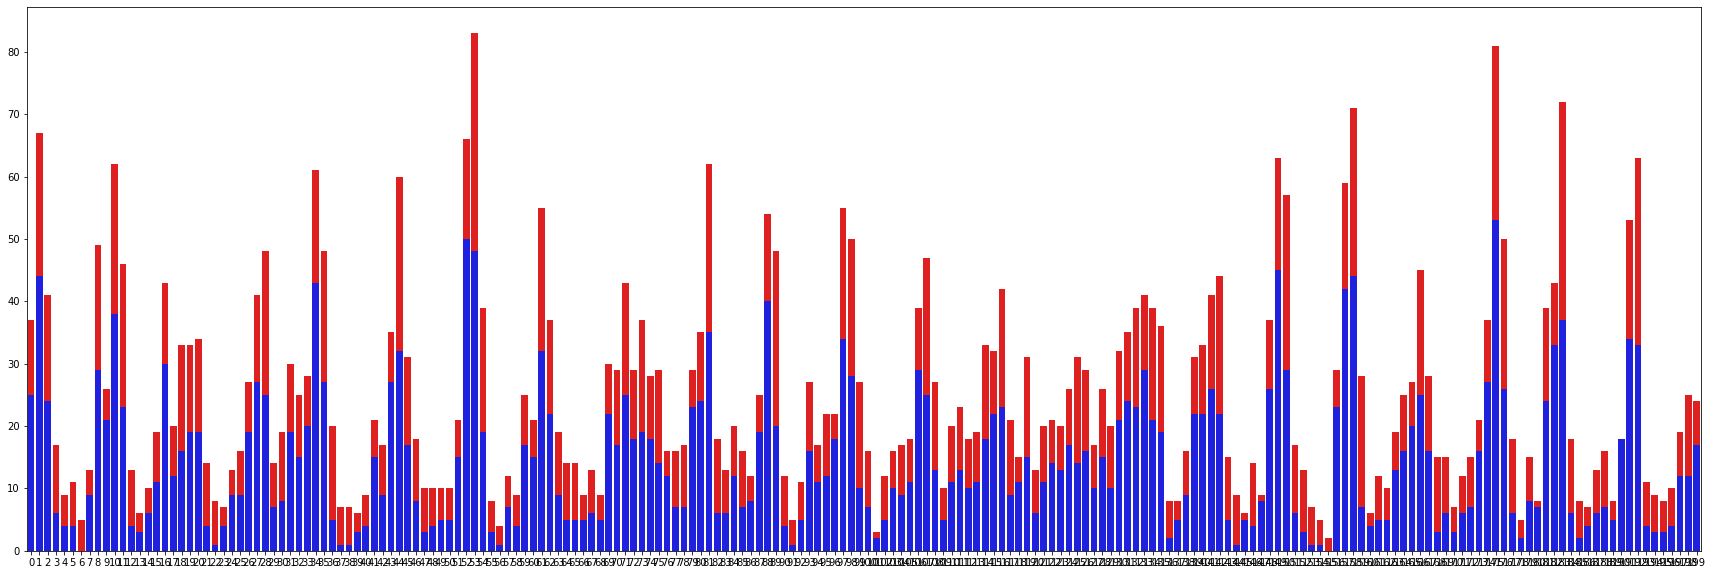

In [34]:
sns.barplot(list(range(0,200)), total1, color='red')
sns.barplot(list(range(0,200)), example1[1:201], color='blue')

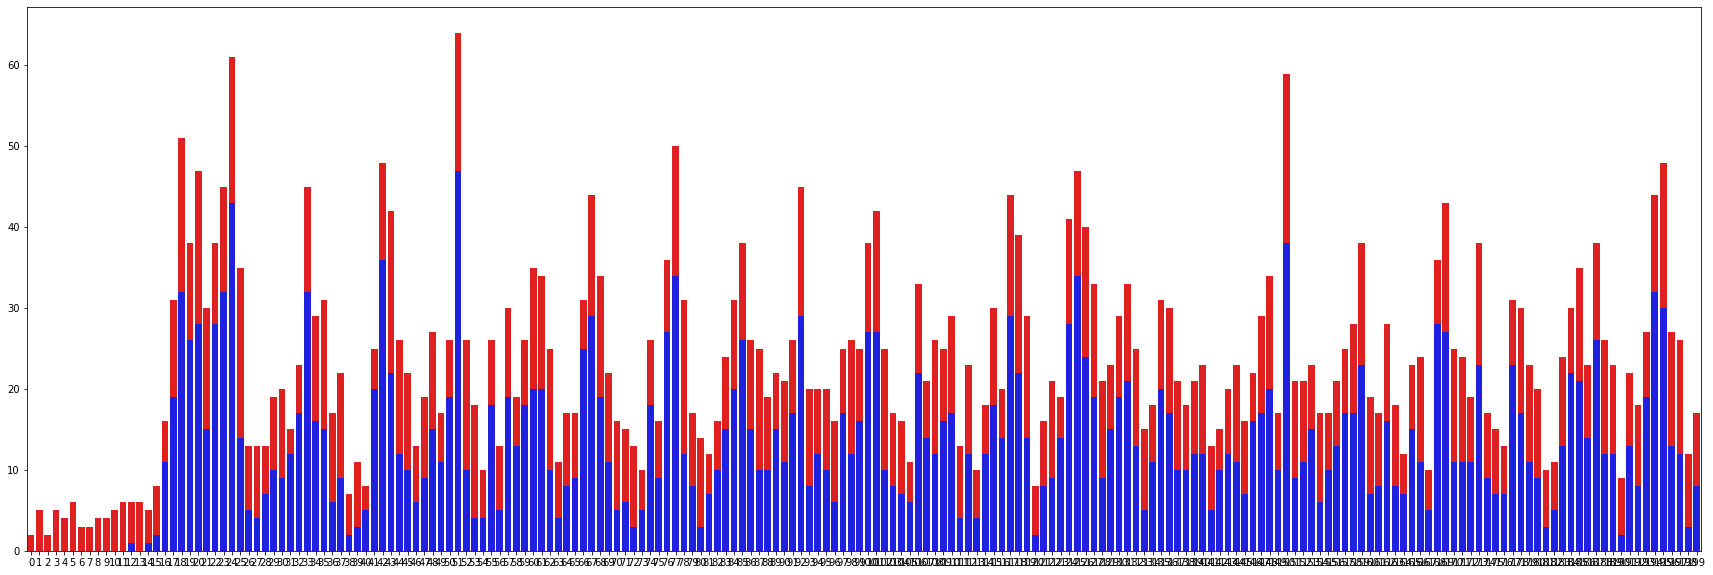

In [35]:
sns.barplot(list(range(0,200)), total2, color='red')
sns.barplot(list(range(0,200)), example2[1:201], color='blue')

In [32]:
distance, path = fastdtw(total1, total2, dist=euclidean)
distance

1776.0

## Actual stuff

In [24]:
# zero = excitatory. One = inhibitory
neuron_types = np.zeros(len(data))

neuron_types[np.where(data[:, 1] > 300)] = 1

neuron_types = neuron_types.reshape(-1, 1)

data = np.concatenate((data, neuron_types), axis=1)

In [25]:
df = pd.DataFrame(data, columns=["time", "neuron index", "type"])

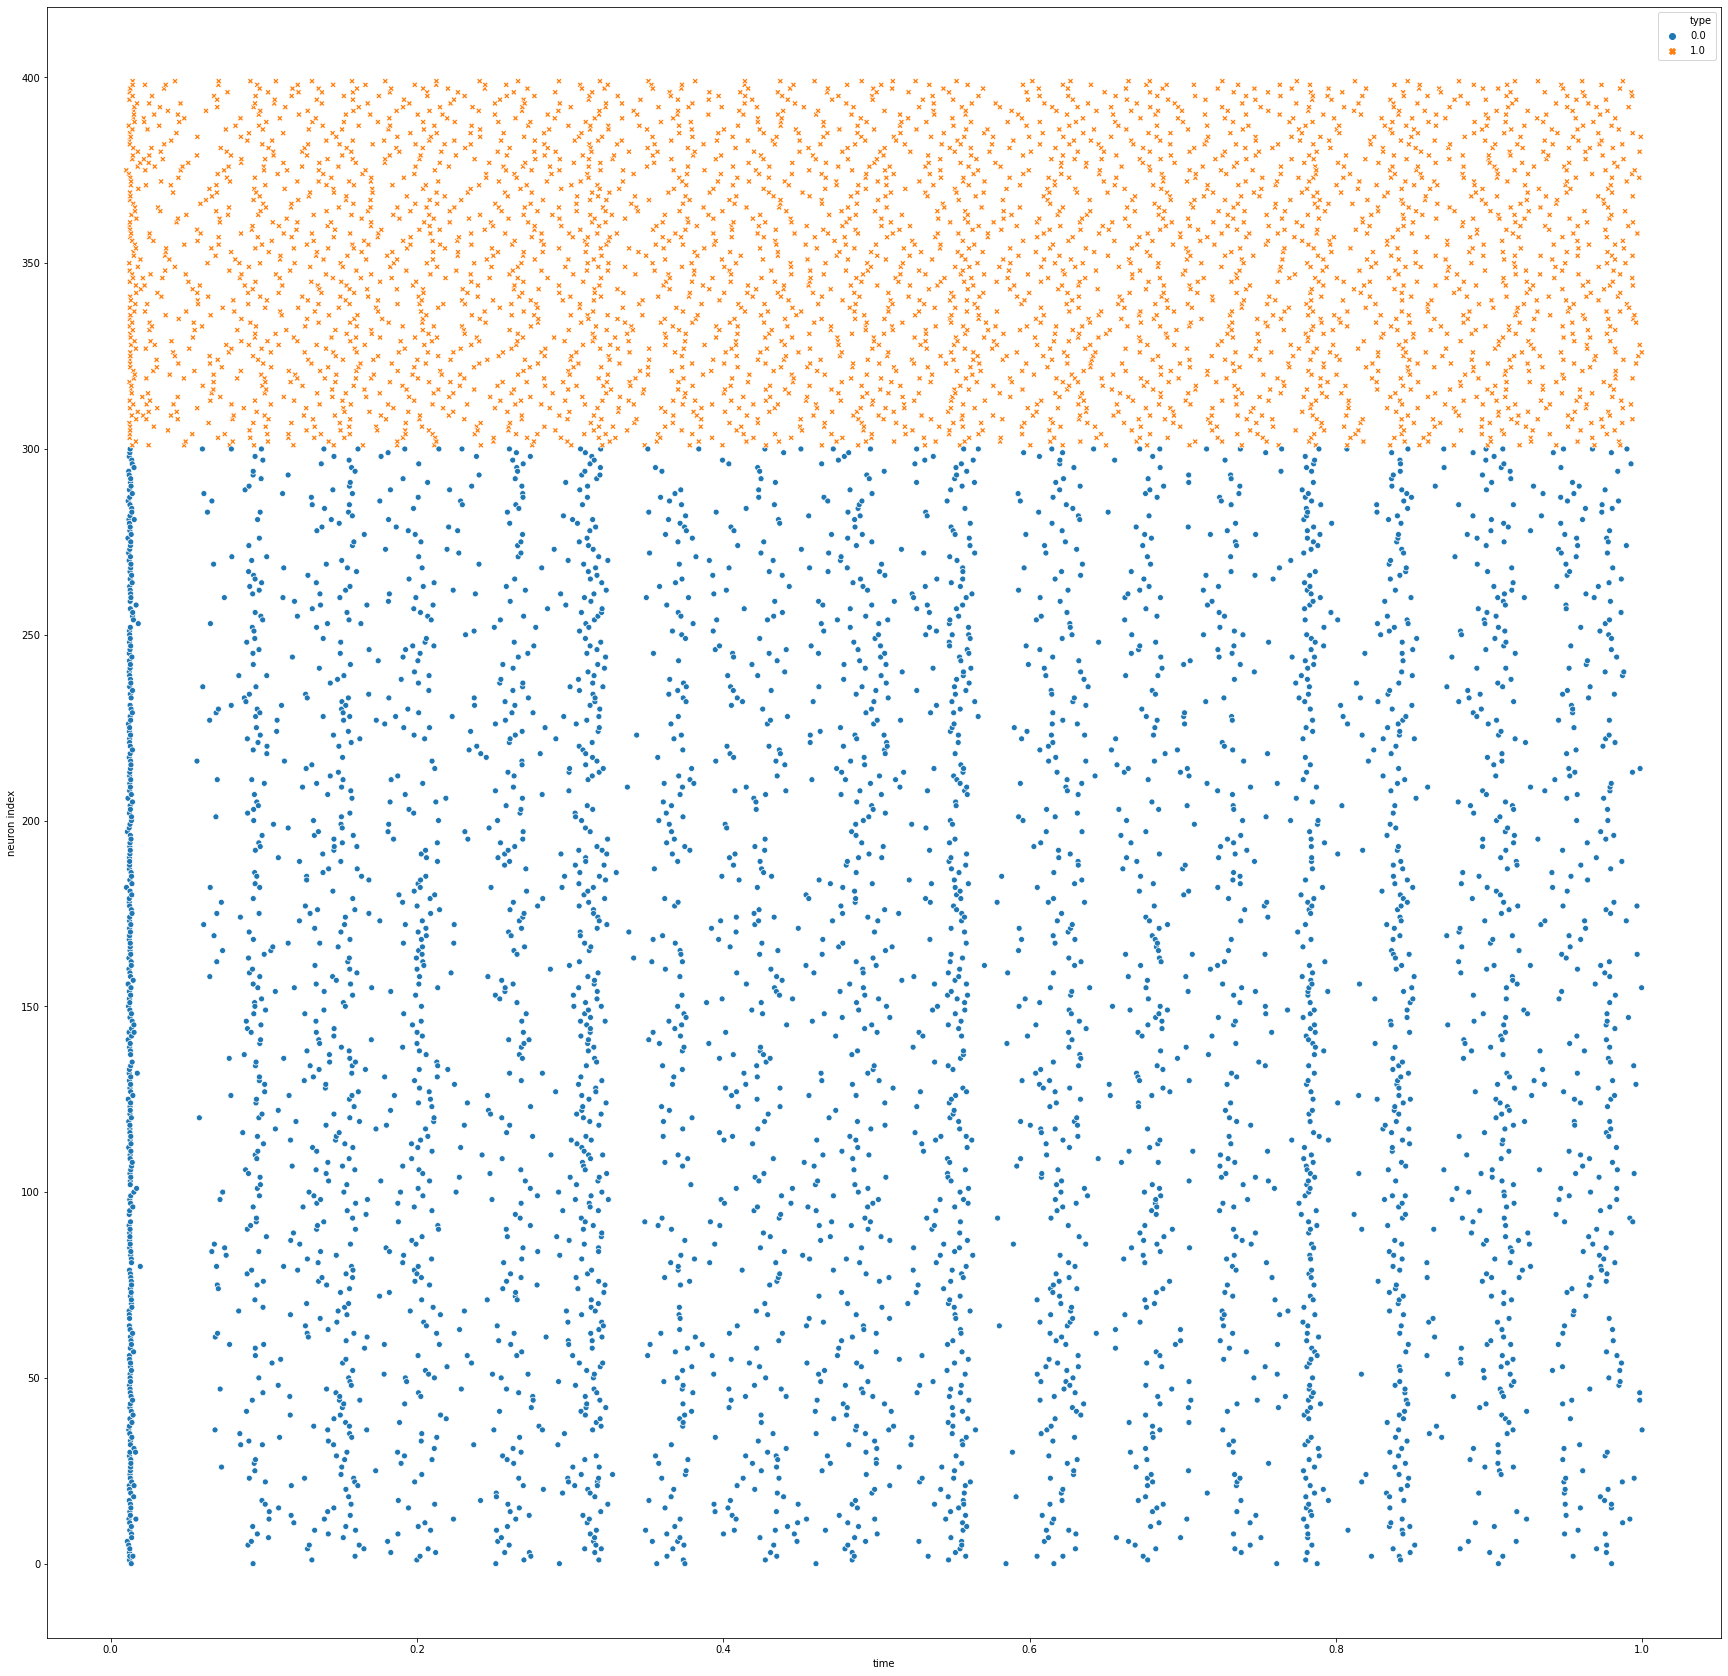

In [26]:
plt.rcParams["figure.figsize"] = (30,30) # width, height
bb